<a href="https://colab.research.google.com/github/kolllurisiripavan/kolllurisiripavan/blob/main/siripavan_ecp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Energy Consumption and Prediction Project








# **MILE STONE 1**



Step1: Data Explorations
Importing libraries


### Reading Dataset
##### The file  is read with a semicolon (;) separator
#####household_power_consumption

In [ ]:
import pandas as pd
import numpy as anp

In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=9d5f2b23-2cda-4ccf-aa3c-3d1fe16e4523
To: /content/household_power_consumption.txt
100% 133M/133M [00:02<00:00, 49.7MB/s]


In [4]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

observation reading the data set is done

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Observation
##### It displayed first 5 rows

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Observation
##### It displayed last 5 rows

#### 'describe()' gives a statistical summary for numerical columns: count, mean, min, max, std deviation

In [ ]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


#### This returns the number of rows and columns

In [ ]:
df.shape

(2075259, 9)

### Observation
##### Dataset has 9 Colums and 2075259 Rows

In [ ]:
df.describe(include = object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


### Observation
##### There are some unique values and missing values

#### 'nunique()' returns the number of unique values in each column

In [ ]:
df.nunique()

,0
Date,1442
Time,1440
Global_active_power,6534
Global_reactive_power,896
Voltage,5168
Global_intensity,377
Sub_metering_1,153
Sub_metering_2,145
Sub_metering_3,32


#### 'info()' provides details about column names, data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Observation
##### The dataset consists of multiple columns, including both numerical and object types

##### Combined 'Date' and 'Time' columns to create a new 'Datetime' column

#### I combined date and time colums because -

#####      Use time-based indexing to easily filter or retrieve data from a specific time range

######     Calculate time intervals between different records

In [ ]:
edf['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

##### Columns that represent numerical values but stored as strings are converted using 'to_numeric'
##### 'errors=coerce' converts non-convertible values to NaN

In [ ]:
cols_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


### Observation
##### All Datatypes changed to float and datetime colums create with datetime datatype

### Checking for null values
#### 'isnull().any()' checks if there are any null values

In [ ]:
df.isnull().any()

,0
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True
Datetime,False


### Observation
##### We have null values in every colums except datetime column

#### Calculate the percentage of null values in each column
##### This helps assess how much data is missing

In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844
Datetime,0.000000


### Observation
##### Every column missing 1.25% of data

#### Recheck for null values after handling

##### We can deal with null values by fill missing values with the mean ,

##### median of the column or delete row which have null values

##### I am filling the mean of the column

In [ ]:
null_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

for col in null_columns:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-19-75b26179aa1f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


#### Recheck for null values after handling

#### Recheck for null values after handling

In [ ]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

### Observation
##### There are no null values

# Data visualization

---

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Matplotlib**




It  is a versatile library for creating all kinds of plots. It's great


for custom plots, as you can adjust nearly every element.

# **Seaborn**
It is built on top of matplotlib and offers more aesthetically pleasing, statistical-oriented plots by default. It’s often easier to use for data exploration and produces attractive visuals without much code.

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2024-11-07 13:24:52--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.28, 3.167.84.148, 3.167.84.9, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.09s   

2024-11-07 13:24:53 (21.3 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


**Observation:**



1.   Repeated Columns
2.   Column Values

Repeated Columns: The column headers seem duplicated or misplaced, which may cause confusion and incorrect indexing when accessing columns.

Column Values: Some values are misaligned or have irregular placements across different rows, like sales data not being in the expected column.


create a graph (0,3)(13,5)(20,19) using matplotlib function

---



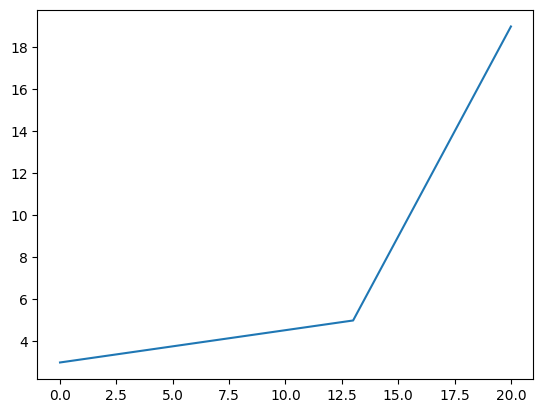

In [ ]:
x_val = [0, 13, 20]
y_val = [3, 5,19]
plt.plot(x_val, y_val)

Observation:

The line starts at (0, 3), moves to (13, 5), and finally goes to (20, 19).
The y-axis values rise significantly as x increases, especially between x = 13 and x = 20, where there is a steeper slope compared to the initial segment.

# Univariate Data Visualization - Categorical **Data**

---

The bar plot is a univariate data visualization plot on a two-dimensional axis. One axis is the category axis indicating the category, while the second axis is the value axis that shows the numeric value of that category, indicated by the length of the bar


In [ ]:
cat_counts = data['Genre'].value_counts()
cat_counts

,count
Genre,
Action,3316
Sports,2400
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


Observation:

Here different types of games has been there with various count



1. data['Genre']:

This accesses the Genre column of the DataFrame data. The assumption is that data is a pandas DataFrame, and Genre is a column within it, likely containing categorical values (like different genres of movies, books, music, etc.).

2. value_counts():

This method counts the unique values in the Genre column. It returns a Series where:
The index represents each unique genre in the column.
The values represent the count (frequency) of each genre.


  

3.  cat_counts:

This variable stores the result of data['Genre'].value_counts(). It will contain a Series where each genre and its count are listed in descending order, with the most frequent genre at the top.




**Creating graph using different plot can use to visualize the information bar chart and count plot**

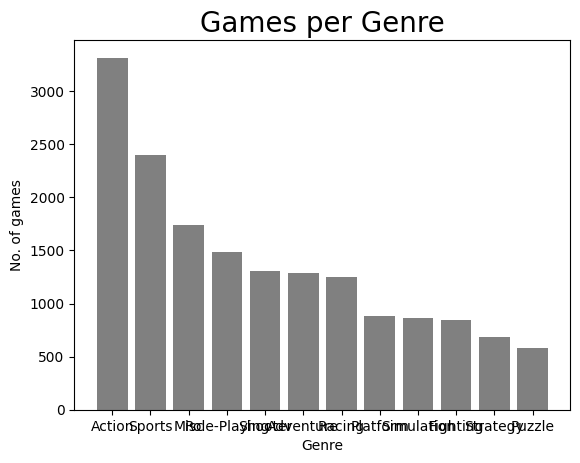

In [ ]:
x_bar=cat_counts.index # generate verical bar chart or normal bar graph
y_bar=cat_counts
plt.xlabel('Genre')
plt.ylabel('No. of games')
plt.title('Games per Genre', fontsize=20)
r = plt.bar(x_bar,y_bar, color='grey') # storeable but not callable

**Plot Elements:**

The x-axis represents different game genres (like Action, Sports, Role-Playing, etc.).
The y-axis shows the count of games in each genre.
The chart title, "Games per Genre," is displayed prominently at the top in a larger font size (fontsize=20).
The x-axis is labeled "Genre," and the y-axis is labeled "No. of games."

**Bar Colors:**

The bars are colored grey (color='grey').

Observation :

The genre names on the x-axis are quite compressed, making them hard to read. This could be improved by rotating the labels or increasing the figure size to enhance readability.

 we can  rotate the tick labels, also increase the fontsize of the same and the width of the bars

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

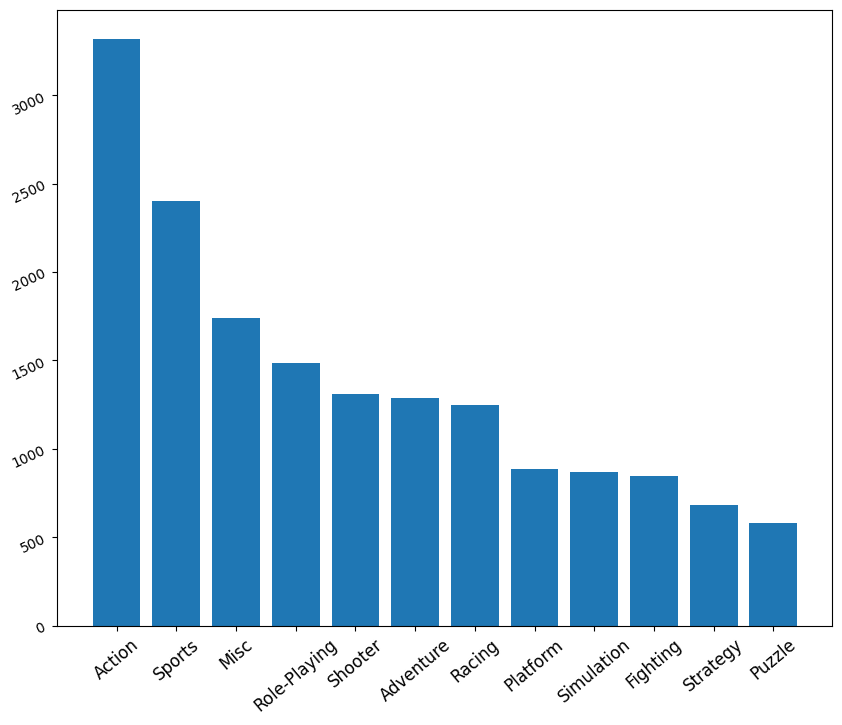

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x_bar,y_bar,width=0.8)
plt.xticks(rotation=40, fontsize=12)
plt.yticks(rotation = 25)

The updated bar chart in the image has been adjusted with the following observations:

Figure Size:

The figure size has been set to (10, 8), which gives the plot more space and makes the bars and labels more readable.

Bar Width and Color:

The width=0.8 parameter has been applied, making each bar slightly narrower, which visually separates them better.
The bars are now in blue, which provides good contrast against the white background.

X-axis and Y-axis Label Rotation:

The x-axis labels are rotated to 40 degrees with plt.xticks(rotation=40, fontsize=12), making them easier to read compared to the previous compressed layout.
The y-axis labels are rotated by 25 degrees with plt.yticks(rotation=25), though this rotation may not be necessary since y-axis values are numeric and generally easier to read without rotation.

Output Information:

There is an array output showing y-tick values and their positions, which is likely the result of plt.yticks() being printed directly.

Plot Clarity:

Overall, the chart is now more readable, with genres clearly visible along the x-axis and counts on the y-axis. However, the 25-degree rotation on the y-axis may not be adding much benefit and could be set to 0.

we can draw a bar chart in Seaborn it is example

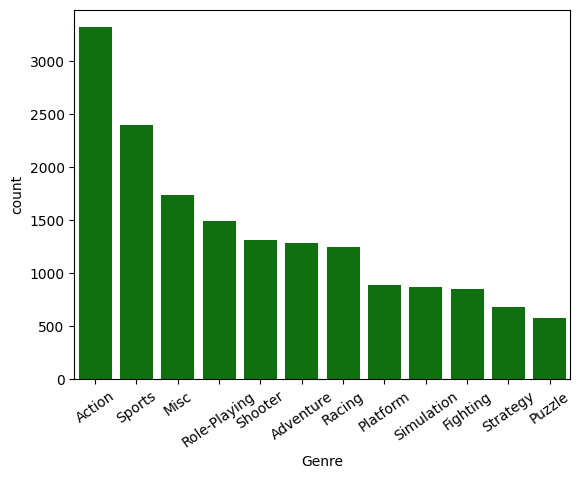

In [ ]:
sns.countplot(x = 'Genre',data=data, order=data.Genre.value_counts().index, color = 'green')
plt.xticks(rotation=35)
plt.show()


Data:
 * The data being visualized appears to be a collection of game titles, each categorized into one of several genres.
 * The genres included in the chart are: Action, Sports, Misc, Role-playing, Adventure, Racing, Simulation, Platform, Strategy, and Puzzle.

Chart:
 * The chart is a vertical bar chart, where the height of each bar represents the number of games in a particular genre.
 * The genres are sorted in descending order of frequency, with the most frequent genre (Action) at the leftmost position.
 * The bars are colored green for a consistent visual representation.
 * The x-axis labels show the different game genres.
 * The y-axis shows the frequency or count of games within each genre.

Observations:
 * Action is the most popular genre with the highest number of games.
 * Puzzle is the least popular genre, with the smallest bar.
 * The genres Sports and Misc have relatively high counts of games.
 * The remaining genres have moderate to low counts of games.



### Pie Chart



---
A pie chart is a type of graph representing data in a circular form, with each slice of the circle representing a fraction or proportionate part of the whole. All slices of the pie add up to make the whole equaling 100 percent and 360 degrees.

 we want to compare the distrubution/proportion of sales across different regions

 EXAMPLE



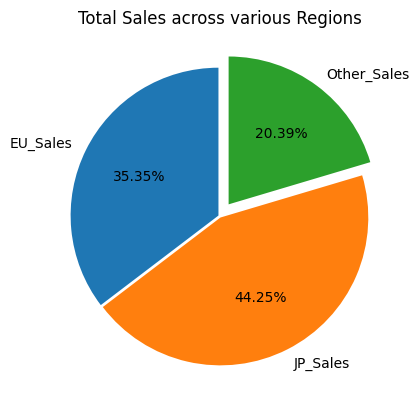

In [ ]:
sales_data = data[['EU_Sales', 'JP_Sales', 'Other_Sales']]
region_sales = sales_data.sum()

plt.pie(region_sales,
       labels=region_sales.index,
       startangle=90,
       explode=(0.01,0.01,0.1),
       autopct = '%.2f%%') # label the wedges with their numeric value # most prefferd start is 90 degree

plt.title('Total Sales across various Regions')
plt.show()

Observations from the Chart:
 * Dominant Region: "JP_Sales" has the largest share with 44.25% of the total sales.
 * EU Sales and Other Sales: These two regions have relatively smaller shares, with 35.35% and 20.39% respectively.
Additional Insights:
 * The "Other_Sales" category might include sales from regions not explicitly mentioned or smaller regions grouped together.
 * The pie chart provides a clear visual representation of the distribution of sales across the different regions.



Finding its sum in pie chart

In [ ]:
sales_data.sum()

,0
NA_Sales,45831.525845
EU_Sales,33251.970702
JP_Sales,41624.625635
Other_Sales,19180.256828


Observation:

**The sum value and its type will be seen**

**HIstogram**

---
**A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar's height indicates the frequency of data points with a value within the corresponding bin.**


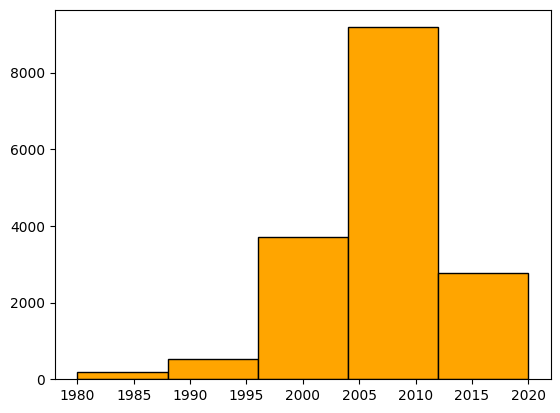

In [ ]:
plt.hist(data['Year'], bins=5, edgecolor = 'black', color='orange')
plt.show()

# **Observations**

- The histogram has it's peak sales in the years 2008 - 2012

In [ ]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sn

Convert date and time from string to date(Year, Month, Day) & time(Hours, minutes) format.


In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Global_active_power'].plot(kind='hist', bins=20, title='Global_active_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Global_reactive_power'].plot(kind='hist', bins=20, title='Global_reactive_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Voltage'].plot(kind='hist', bins=20, title='Voltage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Global_active_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Global_active_power', y='Global_reactive_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Global_reactive_power', y='Voltage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Voltage', y='Global_intensity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Global_active_power']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Global_active_power')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Voltage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Voltage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Global_intensity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Global_intensity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sub_metering_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sub_metering_2')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Global_active_power'].plot(kind='line', figsize=(8, 4), title='Global_active_power')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Global_reactive_power'].plot(kind='line', figsize=(8, 4), title='Global_reactive_power')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Voltage'].plot(kind='line', figsize=(8, 4), title='Voltage')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Global_active_power', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Global_reactive_power', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Voltage', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)



Observation:
 * Data Conversion: The code snippet is converting several columns in a DataFrame (likely named df) to numeric data types using the pd.to_numeric() function. This is often necessary when working with data from files like CSV or Excel, which might store numerical values as strings.
 * Error Handling: The errors='coerce' argument is used to handle non-numeric values. If a value cannot be converted to a number, it will be replaced with NaN (Not a Number). This prevents errors during the conversion process.
 * Column Names: The columns being converted seem to be related to energy consumption data, possibly from a household electricity meter. The names suggest measurements like:

   * Global_active_power: Total active power consumption
   * Global_reactive_power: Total reactive power consumption
   * Voltage: Voltage level
   * Global_intensity: Current intensity
   * sub_metering_1 and sub_metering_2: Sub-meter readings (likely for specific appliances or circuits)

Output:

The df.head() command displays the first few rows of the DataFrame after the conversion. This allows you to visually inspect the data and verify that the conversion was successful.






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB



Observation:
 * Data Type Information: The df.info() method provides a summary of the DataFrame, including:
   * The number of entries (2075259)
   * The number of columns (9)
   * The data type of each column
   * The memory usage of the DataFrame
 * Data Types:
   * The columns Date and Time are of type object, which typically indicates they contain string values.
   * The remaining columns are of type float64, suggesting they hold numerical values with decimal points.
 * Data Size: The DataFrame occupies 142.5+ MB of memory, which is significant. This might be due to the large number of entries and the presence of floating-point numbers.


**Find whether the day is holiday or not**

In [ ]:
# Start of your data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,0.0,0


from matplotlib import pyplot as plt
_df_37['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Global_active_power'].plot(kind='hist', bins=20, title='Global_active_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Voltage'].plot(kind='hist', bins=20, title='Voltage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='index', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='Time', y='Global_active_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='Global_active_power', y='Voltage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='Voltage', y='Global_intensity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Global_active_power']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Global_active_power')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Voltage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Voltage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Global_intensity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Global_intensity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_48.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_49['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Global_active_power'].plot(kind='line', figsize=(8, 4), title='Global_active_power')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['Voltage'].plot(kind='line', figsize=(8, 4), title='Voltage')
plt.gca().spines[['top', 'right']].set_visible(False)

Observations
 * The code focuses on creating features that might be relevant for a time-series forecasting or energy consumption prediction model.
 * The Is_holiday feature captures the impact of holidays on energy consumption patterns.
 * The Light feature accounts for the influence of day and night cycles.
 * The normalized Time feature provides a continuous representation of time that can be used in machine learning models.


# MILE STONE **3**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Check the column names in your DataFrame 'df'
print(df.columns)

# Assuming the correct column names are 'datetime', 'holiday', and 'sunlight'
# Replace them with the actual names from the output of df.columns
X = df.drop(['Global_active_power', 'datetime', 'Date', 'Time', 'holiday', 'sunlight'], axis=1)
y = df['Global_active_power']

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear regression
It is a data analysis technique that predicts the value of unknown data by using another related and known data value.

In [28]:
class LinearRegression:
    # Initializing the parameters
    def __init__(self, learning_rate, no_of_itr):
        self.learning_rate = learning_rate
        self.no_of_itr = no_of_itr

    def fit(self, X, Y):
        # Number of training examples and features
        self.m, self.n = X.shape  # Rows and columns of X
        # Initializing weights and bias
        self.w = np.zeros((self.n, 1))  # Zero matrix with size n x 1
        self.b = 0
        self.X = X
        self.Y = Y

        # Gradient descent
        for _ in range(self.no_of_itr):
            self.update_weights()

    def update_weights(self):
        # Predictions
        Y_prediction = self.predict(self.X)

        # Calculating gradients
        dw = -(self.X.T).dot(self.Y - Y_prediction) / self.m
        db = -np.sum(self.Y - Y_prediction) / self.m

        # Updating weights and bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        # Prediction formula
        return X.dot(self.w) + self.b

    def print_weights(self):
        # Printing weights and bias
        print("Weights for the respective features are:")
        print(self.w)
        print()
        print("Bias value for the regression is:", self.b)



**Observations:**
 * Loss Function: The code uses the mean squared error loss function, which is a standard choice for linear regression.
 * Learning Rate: The choice of learning rate is crucial. If it's too large, the algorithm might overshoot the minimum. If it's too small, convergence can be slow.
 * Number of Iterations: The number of iterations determines how long the algorithm runs. More iterations can lead to better accuracy, but it might also increase computation time.
 * Feature Scaling: Consider normalizing or standardizing the features to improve convergence and accuracy.
 * Regularization: Techniques like L1 or L2 regularization can help prevent overfitting.
 * Model Evaluation: The code doesn't include any evaluation metrics like mean squared error or R-squared to assess the model's performance.
Potential Improvements:
 * Regularization: Add L1 or L2 regularization terms to the loss function to prevent overfitting.
 * Feature Scaling: Implement normalization or standardization to improve convergence.
 * Evaluation Metrics: Calculate and print evaluation metrics like mean squared error and R-squared.


In [8]:

# Sample data
X = np.array([[1], [2], [3], [4], [5]])  # Features
Y = np.array([[2], [4], [6], [8], [10]])  # Target values (2x the feature)

# Initialize and train the model
model = LinearRegression(learning_rate=0.01, no_of_itr=1000)
model.fit(X, Y)

# Display weights and bias
model.print_weights()

# Make predictions
X_test = np.array([[6], [7], [8]])
predictions = model.predict(X_test)
print("Predictions for input", X_test.flatten(), "are:", predictions.flatten())


Weights for the respective features are:
[[1.97375488]]

Bias value for the regression is: 0.09475321533750963
Predictions for input [6 7 8] are: [11.93728249 13.91103737 15.88479225]


**Observations from the Code and Output:**
1. Linear Regression Model:
 * The code implements a simple linear regression model.
 * The goal is to predict a target value (Y) based on a single feature (X).
 * The target value (Y) is 2 times the corresponding feature value (X).
2. Model Initialization and Training:
 * LinearRegression class is used to initialize the model.
 * learning_rate is set to 0.01, which controls the step size during gradient descent.
 * no_of_itr is set to 1000, determining the number of iterations for training.
 * The fit() method trains the model on the given data (X and Y).
3. Weights and Bias:
 * The model learns two parameters:
   * Weight (w): This scales the input feature.


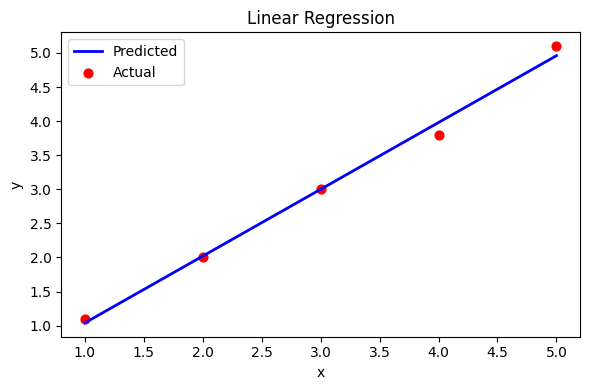

Results: RSS=0.056, Intercept=0.060, Coefficients=0.980


In [ ]:

# Sample dataset
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1.1, 2.0, 3.0, 3.8, 5.1]
})

# Define a function for linear regression
def linear_regression(data, predictors):
    """
    Perform Linear Regression and plot the results.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Fit the Linear regression model
    linreg = LinearRegression()
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])

    # Plotting the results
    plt.figure(figsize=(6, 4))
    plt.plot(data['x'], y_pred, label='Predicted', color='blue', linewidth=2)
    plt.scatter(data['x'], data['y'], color='red', label='Actual', s=40)
    plt.title('Linear Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return results
    rss = np.sum((y_pred - data['y']) ** 2)
    ret = [rss]  # Residual sum of squares
    ret.extend([linreg.intercept_])  # Intercept
    ret.extend(linreg.coef_)  # Coefficients
    return ret

# Run linear regression
predictors = ['x']
results = linear_regression(data, predictors)
print(f"Results: RSS={results[0]:.3f}, Intercept={results[1]:.3f}, Coefficients={results[2]:.3f}")


Overall, the code performs the following steps:
 * Imports necessary libraries.
 * Defines a function to perform linear regression and plot results.
 * Creates a sample dataset.
 * Fits a linear regression model.
 * Calculates predicted values.
 * Plots the actual data and predicted line.
 * Calculates RSS.
 * Prints the model results.

 The blue line representing the predicted values from the linear regression model appears to fit the red dots representing the actual data points reasonably well. This suggests that the model captures the general trend in the data.
Residuals:



In [9]:

# Generating some sample data
# Example: y = 2x + 3 (linear relationship)
X = np.array([[1], [2], [3], [4], [5]])
Y = np.array([[5], [7], [9], [11], [13]])

# Creating an instance of the LinearRegression class
model = LinearRegression(learning_rate=0.01, no_of_itr=1000)

# Training the model
model.fit(X, Y)

# Printing the weights and bias
model.print_weights()

# Making predictions
X_test = np.array([[6], [7], [8]])
predictions = model.predict(X_test)
print("Predictions for X_test are:")
print(predictions)


Weights for the respective features are:
[[2.1158847]]

Bias value for the regression is: 2.581619456736265
Predictions for X_test are:
[[15.27692767]
 [17.39281237]
 [19.50869707]]


# Lasso regression
It is a regularization technique that applies a penalty to prevent overfitting and enhance the accuracy of statistical models.

In [19]:
!pip install scikit-learn


def lasso_regression(data, predictors, alpha, models_to_plot={}):
    """
    Perform Lasso Regression and optionally plot the results.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.
    - alpha (float): Regularization strength for Lasso regression.
    - models_to_plot (dict): Dictionary with alpha as keys and subplot positions as values.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Standardize the predictors
    scaler = StandardScaler()
    X = scaler.fit_transform(data[predictors])
    y = data['y'].values

    # Fit the Lasso regression model
    lassoreg = Lasso(alpha=alpha, max_iter=int(1e5))
    lassoreg.fit(X, y)
    y_pred = lassoreg.predict(X)

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred, label='Predicted')
        plt.scatter(data['x'], data['y'], color='red', label='Actual')
        plt.title(f'Plot for alpha: {alpha:.3g}')
        plt.legend()

    # Return results
    rss = np.sum((y_pred - y) ** 2)
    ret = [rss]  # Residual sum of squares
    ret.extend([lassoreg.intercept_])  # Intercept
    ret.extend(lassoreg.coef_)  # Coefficients
    return ret

Alpha: 0.1, Results: [0.036548875905232425, 2.9999999999999996, 0.847781912112685, 0.531229367343642]
Alpha: 1.0, Results: [0.12783038501560867, 2.9999999999999996, 0.6607266589796879, 0.6044789850230442]
Alpha: 10.0, Results: [2.4752423297118336, 2.9999999999999996, 0.34962972422261773, 0.34353117076067785]


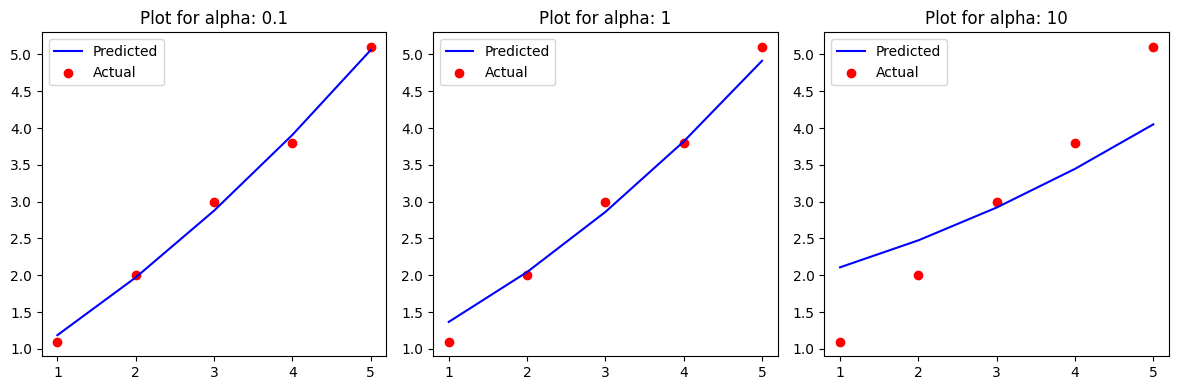

In [22]:
# Sample dataset
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1.1, 2.0, 3.0, 3.8, 5.1]
})
data['x_squared'] = data['x']**2

# Define predictors
predictors = ['x', 'x_squared']

# Define alpha values and models to plot
alphas = [0.1, 1.0, 10.0]
models_to_plot = {0.1: 131, 1.0: 132, 10.0: 133}

# Plotting results
plt.figure(figsize=(12, 4))
for alpha in alphas:
    result = ridge_regression(data, predictors, alpha, models_to_plot=models_to_plot)
    print(f"Alpha: {alpha}, Results: {result}")

plt.show()


 Alpha = 0.1: The model fits the data closely, capturing the trend well. The coefficients for both features are non-zero.
 * Alpha = 1.0: The model is more regularized, leading to a simpler model with smaller coefficients. The line is slightly less curved, indicating a less complex relationship.
 * Alpha = 10.0: The model is even more strongly regularized, resulting in a nearly flat line. This suggests that the model has essentially ignored the features and is predicting a constant value.


# Ridge regression
It is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

In [26]:


def ridge_regression(data, predictors, alpha, models_to_plot={}):
    """
    Perform Ridge Regression and optionally plot the results.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.
    - alpha (float): Regularization strength for Ridge regression.
    - models_to_plot (dict): Dictionary with alpha as keys and subplot positions as values.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Standardize the predictors
    scaler = StandardScaler()
    X = scaler.fit_transform(data[predictors])
    y = data['y'].values

    # Fit the Ridge regression model
    ridgereg = Ridge(alpha=alpha, max_iter=int(1e5))
    ridgereg.fit(X, y)
    y_pred = ridgereg.predict(X)

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred, label='Predicted', color='blue')
        plt.scatter(data['x'], data['y'], color='red', label='Actual')
        plt.title(f'Plot for alpha: {alpha:.3g}')
        plt.legend()

    # Return results
    rss = np.sum((y_pred - y) ** 2)
    ret = [rss]  # Residual sum of squares
    ret.extend([ridgereg.intercept_])  # Intercept
    ret.extend(ridgereg.coef_)  # Coefficients
    return ret


Alpha: 0.1, Results: [0.036548875905232425, 2.9999999999999996, 0.847781912112685, 0.531229367343642]
Alpha: 1.0, Results: [0.12783038501560867, 2.9999999999999996, 0.6607266589796879, 0.6044789850230442]
Alpha: 10.0, Results: [2.4752423297118336, 2.9999999999999996, 0.34962972422261773, 0.34353117076067785]


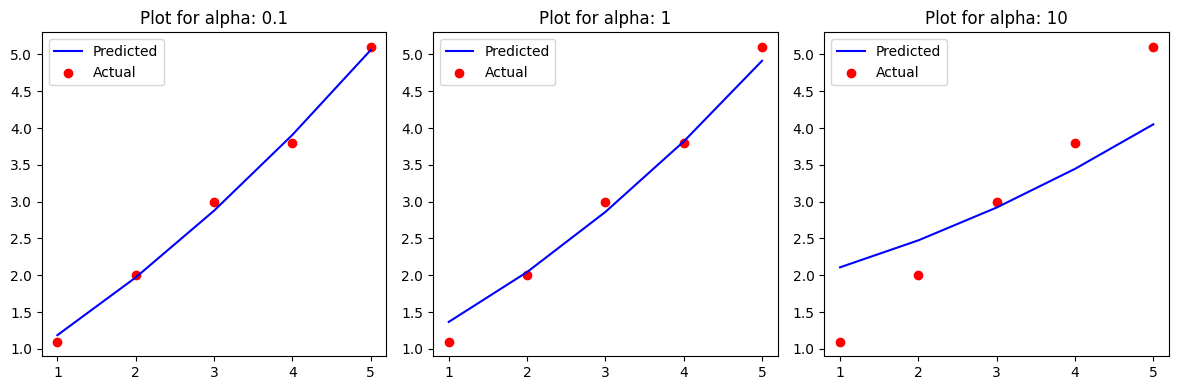

In [27]:
# Sample dataset
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1.1, 2.0, 3.0, 3.8, 5.1]
})
data['x_squared'] = data['x']**2

# Define predictors
predictors = ['x', 'x_squared']

# Define alpha values and models to plot
alphas = [0.1, 1.0, 10.0]
models_to_plot = {0.1: 131, 1.0: 132, 10.0: 133}

# Plotting results
plt.figure(figsize=(12, 4))
for alpha in alphas:
    result = ridge_regression(data, predictors, alpha, models_to_plot=models_to_plot)
    print(f"Alpha: {alpha}, Results: {result}")

plt.show()


**Observation** :

 Subplots showing how predictions vary for different alpha values. Ridge regularization shrinks coefficients, but unlike Lasso, they do not become zero.

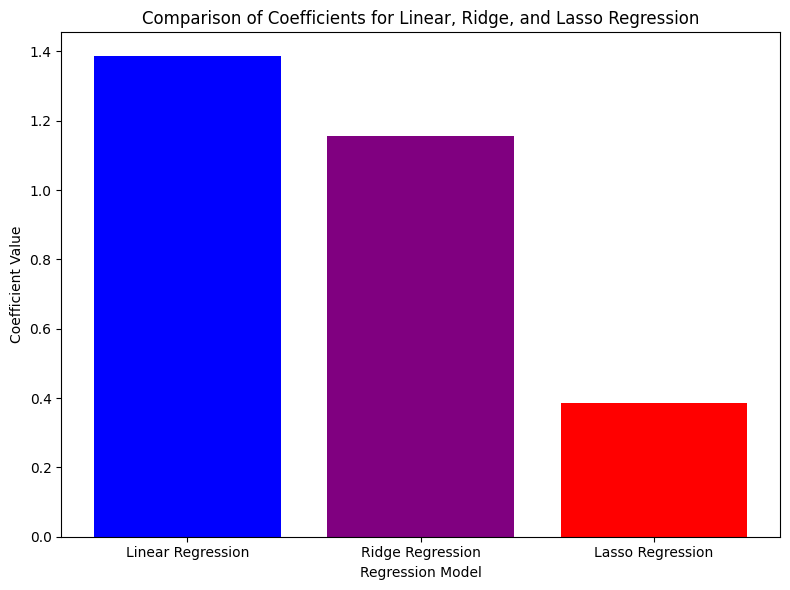

In [25]:


# Sample regression results for the coefficients of Linear, Ridge, and Lasso
results = {
    "Linear Regression": {"Coefficients": [1.386]},
    "Ridge Regression": {"Coefficients": [1.155]},
    "Lasso Regression": {"Coefficients": [0.386]}
}

# Extracting coefficients for plotting
model_names = list(results.keys())
coefficients = [result['Coefficients'][0] for result in results.values()]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, coefficients, color=['blue', 'purple', 'red'])
plt.title('Comparison of Coefficients for Linear, Ridge, and Lasso Regression')
plt.xlabel('Regression Model')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


Observations:
 * Coefficient Magnitude: The Linear Regression model has the highest coefficient value, followed by Ridge Regression, and then Lasso Regression. This suggests that Linear Regression assigns the most importance to the feature, while Lasso Regression assigns the least importance.
 * Regularization Effect: Ridge and Lasso Regression are regularization techniques that penalize large coefficients to prevent overfitting. The smaller coefficients for Ridge and Lasso compared to Linear Regression indicate the effect of regularization.
